# Final Project
## Connor Holland
### 12/13/24

***

#### Q1

In [16]:
import pandas as pd
s = pd.read_csv("social_media_usage.csv")
s.shape

(1502, 89)

***

#### Q2

In [33]:
import numpy as np
def clean_sm (x):
    x = np.where(x == 1, 1, 0)
    return x
    
toy_df = pd.DataFrame({'A': [5, 1, 12], 'B': [0, 1, 5]})
print(toy_df)

cleaned_toy_df = clean_sm(toy_df)
print(cleaned_toy_df)

    A  B
0   5  0
1   1  1
2  12  5
[[0 0]
 [1 1]
 [0 0]]


***

#### Q3

/var/folders/ng/tvbgv2jn62n0krpw4r35yyf40000gn/T/ipykernel_20670/3207583238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["income"] = np.where(ss["income"] > 9 , np.nan, ss["income"])
/var/folders/ng/tvbgv2jn62n0krpw4r35yyf40000gn/T/ipykernel_20670/3207583238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["educ2"] = np.where(ss["educ2"] > 8 , np.nan, ss["educ2"])
/var/folders/ng/tvbgv2jn62n0krpw4r35yyf40000gn/T/ipykernel_20670/3207583238.py:5: SettingWithCopyWarning: 
A value is trying to b

             income  education    parent   married    female       age  \
income     1.000000   0.438773  0.093554  0.402396 -0.098204  0.022394   
education  0.438773   1.000000  0.037349  0.206708  0.052714  0.111718   
parent     0.093554   0.037349  1.000000  0.246857  0.034091 -0.263081   
married    0.402396   0.206708  0.246857  1.000000 -0.050469  0.172778   
female    -0.098204   0.052714  0.034091 -0.050469  1.000000  0.096999   
age        0.022394   0.111718 -0.263081  0.172778  0.096999  1.000000   
sm_li      0.329674   0.310088  0.102495  0.084226 -0.076186 -0.159209   

              sm_li  
income     0.329674  
education  0.310088  
parent     0.102495  
married    0.084226  
female    -0.076186  
age       -0.159209  
sm_li      1.000000  


alt.Chart(...)

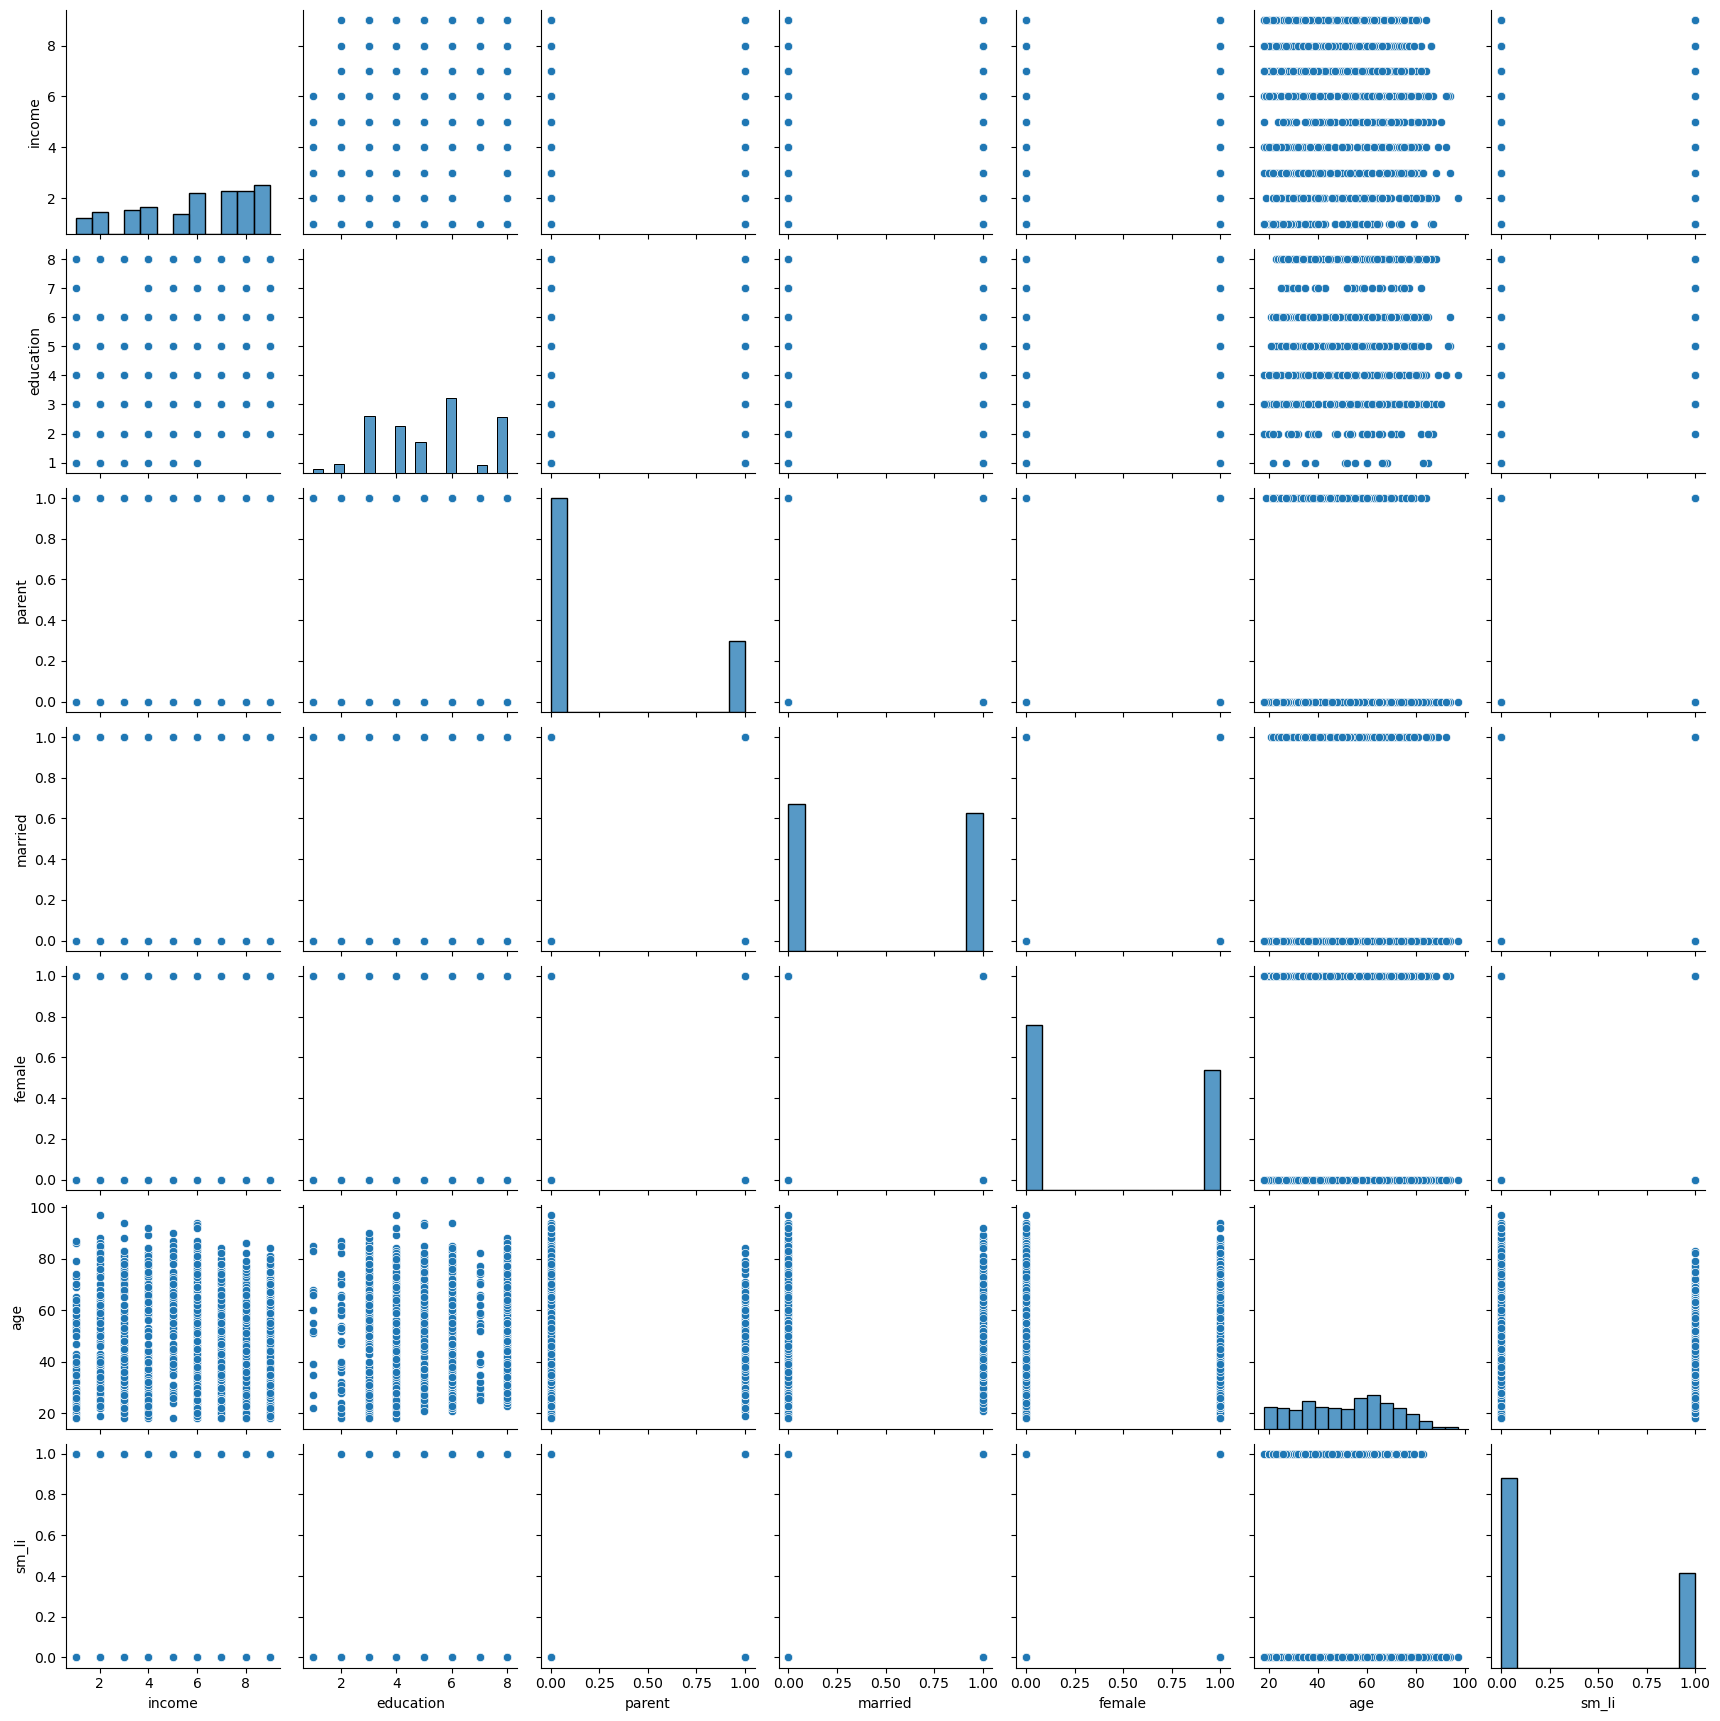

In [97]:
## data cleaning
ss = s[["income","educ2","par","marital","gender","age","web1h"]]
ss["income"] = np.where(ss["income"] > 9 , np.nan, ss["income"])
ss["educ2"] = np.where(ss["educ2"] > 8 , np.nan, ss["educ2"])
ss["par"] = np.where(ss["par"] == 1 , 1, 0)
ss["marital"] = np.where(ss["marital"] == 1 , 1, 0)
ss["gender"] = np.where(ss["gender"] == 2 , 1, 0)
ss["age"] = np.where(ss["age"] > 98 , np.nan, ss["age"])
ss["web1h"] = clean_sm(ss["web1h"])

ss = ss.rename(columns={"educ2" : "education", "par" : "parent", "marital" : "married", "gender" : "female", "web1h" : "sm_li"})
ss = ss.dropna()

## exploratory analysis
correlation_matrix = ss.corr()
print(correlation_matrix)

import seaborn as sns
sns.pairplot(ss)

import altair as alt
alt.Chart(ss).mark_circle(opacity = .2).encode(x="income",
      y="age",
      color=alt.Color('sm_li:N', scale=alt.Scale(scheme='category10')))

## Initially, it looks like higher income younger people are the most common users and income looks like a stronger predictor than age.

***

#### Q4

In [111]:
y = ss["sm_li"]
X = ss[["education","income","parent","married","female","age"]]

***

#### Q5

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=534)

X_train has 80% of the feature data and contains only the features that will be used to build and train the model.
X_test has 20% of the feature data and contains only the features that will be used to test the model on unseen data to guage its performance and usefulness.
y_train has 80% of the target data and contains only the targets that the model will attempt to predict while we build.
y_test has 20% of the target data and contains only the targets that the model will attempt to predict when we test the model on unseen data to guage its performance and usefulness.

*** 

#### Q6

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

***

#### Q7

In [130]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[95, 73],
       [24, 60]])

The accuracy is .615 or 61.5%. 
95 is the number of instances where the model correctly predicted that the person was not a LinkedIn User.
60 is the number of instances where the model correctly predicted that the person was a LinkedIn User.
24 is the number of instances where the model incorrectly predicted that the person was not a LinkedIn User. They actually were LinkedIn Users.
73 is the number of instances where the model incorrectly predicted that the person was a LinkedIn User. They actually were not LinkedIn Users.

***

#### Q8

In [138]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"])

Predicted negative  Predicted positive
Actual negative                  95                  73
Actual positive                  24                  60

*** 

#### Q9

Precision: .45 -> This means that when the model predicts someone is a LinkedIn user, it is only correct 45% of the time. High precision might be important for something like detecting fraud among premium credit card users. If you accuse someone of fraud, you want to be really confident that you are correct to avoid offending them.

Recall: .71 -> This means that when the person is a LinkedIn user, the model will accurately catch that 71% of the time. High recall would be important for things like cancer screening. If the patient has cancer, you want a very, very high chance that the screening will catch it so you can begin treatment.

F1: .55 -> This measurement shows the balance of the model between precision and recall. Thus, a higher f-score is needed for things that need a balance between precision and recall. An example would be customers that will churn from your service. You don't want false positives because these customers may get annoyed by your additional marketing. However, you also dont want false negatives because customers may leave before you've had the chance to convince them to stay. 

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.66       168
           1       0.45      0.71      0.55        84

    accuracy                           0.62       252
   macro avg       0.62      0.64      0.61       252
weighted avg       0.68      0.62      0.63       252



***

#### Q10

In [153]:
X.head()

education  income  parent  married  female   age
0        4.0     6.0       0        0       1  77.0
1        3.0     5.0       0        0       0  59.0
2        4.0     8.0       0        1       1  60.0
3        8.0     8.0       0        0       0  73.0
4        8.0     7.0       0        1       1  65.0

In [187]:
person_young = [7,8,0,1,1,42]
predicted_class_young = np.where(lr.predict([person_young]) == 1, "Yes", "No")
probs_young = lr.predict_proba([person_young])
print(f"Will the 42 year old have a LinkedIn? {predicted_class_young}")
print(f"Probability that this person is pro-environment: {round(probs_young[0][1],4)*100}%")

person_old = [7,8,0,1,1,82]
predicted_class_old = np.where(lr.predict([person_old]) == 1, "Yes", "No")
probs_old = lr.predict_proba([person_old])
print(f"Will the 82 year old have a LinkedIn? {predicted_class_old}")
print(f"Probability that this person is pro-environment: {round(probs_old[0][1],4)*100}%")

Will the 42 year old have a LinkedIn? ['Yes']
Probability that this person is pro-environment: 73.7%
Will the 82 year old have a LinkedIn? ['No']
Probability that this person is pro-environment: 48.65%
